In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
%matplotlib inline

In [3]:
sales = pd.read_csv(
    'sales_data.csv',
    parse_dates=['Date'])

In [3]:
sales['Revenue']=(sales['Order_Quantity']*sales['Unit_Price'])
sales['Profit']=(sales['Revenue']-sales['Cost'])
sales.head(5)

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,600,360,960
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,600,360,960
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1725,1035,2760
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1500,900,2400
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,300,180,480


In [5]:
sales['Revenue'].sum()

95176318

In [6]:
sales.loc[(sales['Year'] == 2011) & (sales['Year'] == 2012), 'Revenue'].sum()

20355127

In [7]:
mask = (sales['Date'].dt.to_period('Y') == pd.to_datetime('2011').to_period('Y'))
y = sales.loc[mask]

In [8]:
y['Revenue'].sum()

10065457

In [7]:
sales.groupby(['Year'])[['Revenue']].sum()

,Revenue
Year,
2011,10065457
2012,10289670
2013,17028380
2014,15705990
2015,22405052
2016,19681769


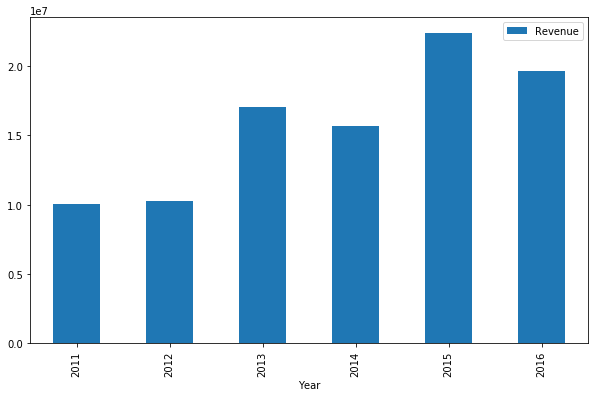

In [11]:
sales.groupby(['Year'])[['Revenue']].sum().plot(kind='bar', figsize=(10,6))

In [13]:
sales.groupby(['Year'])[['Profit']].sum()

,Profit
Year,
2011,3981870
2012,4065680
2013,7747551
2014,7417353
2015,9909624
2016,9004332


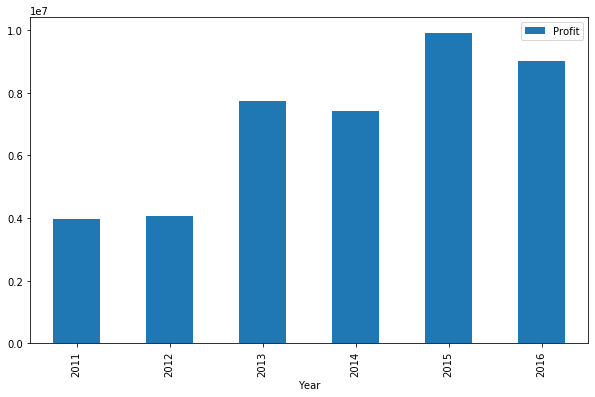

In [14]:
sales.groupby(['Year'])[['Profit']].sum().plot(kind='bar', figsize=(10,6))

In [13]:
sales.loc[(sales['Year']==2013) | (sales['Year']==2014), 'Age_Group'].value_counts()

Adults (35-64)          26705
Young Adults (25-34)    18353
Youth (<25)              8425
Seniors (64+)             358
Name: Age_Group, dtype: int64

In [68]:
sales.loc[(sales['Year']==2013, 'Month')].value_counts()

December     5270
November     4174
October      4146
September    3885
August       3819
July         1411
May           335
June          321
April         294
February      272
March         272
January       244
Name: Month, dtype: int64

In [69]:
sales.loc[(sales['Year']==2014, 'Month')].value_counts()

June        5082
May         5015
April       4590
March       4366
January     4210
February    4068
July        2067
Name: Month, dtype: int64

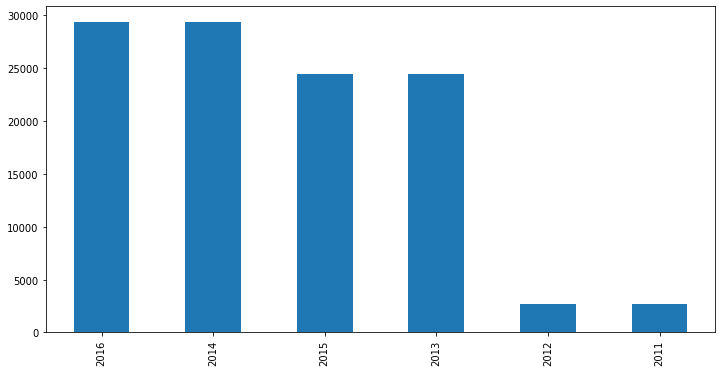

In [72]:
sales['Year'].value_counts().plot(kind='bar', figsize=(12,6))

In [73]:
sales.describe()

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000
mean,15.665753,2014.401739,35.919212,11.901660,267.296366,452.938427,372.681358,469.318695,842.000053
std,8.781567,1.272510,11.021936,9.561857,549.835483,922.071219,595.080571,884.866118,1466.202934
min,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000
25%,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,39.000000,28.000000,70.000000
50%,16.000000,2014.000000,35.000000,10.000000,9.000000,24.000000,135.000000,108.000000,245.000000
75%,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,432.000000,432.000000,880.000000
max,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,26158.000000,42978.000000,69136.000000


In [74]:
sl=sales.groupby(['Product_Category','Sub_Category','Product','Customer_Age'])[['Order_Quantity']].sum()
sl

Order_Quantity
Product_Category Sub_Category Product                 Customer_Age                
Accessories      Bike Racks   Hitch Rack - 4-Bike     17                        42
                                                      18                        72
                                                      19                        61
                                                      21                        15
                                                      22                        15
...                                                                            ...
Clothing         Vests        Classic Vest, S         58                        65
                                                      62                        17
                                                      70                        29
                                                      79                        10
                              Touring-1000 Yellow, 50 52                        56

[4080 rows x 1 columns]

In [75]:
sales.loc[sales['Revenue'] > 10000].shape[0]

377

In [76]:
sl.columns

Index(['Order_Quantity'], dtype='object')

In [17]:
q= sales.loc[sales['Product']=='Water Bottle - 30 oz.']
q.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
1056,2014-03-25,25,March,2014,50,Adults (35-64),F,Australia,New South Wales,Accessories,Bottles and Cages,Water Bottle - 30 oz.,20,2,5,60,40,100
1057,2016-03-25,25,March,2016,50,Adults (35-64),F,Australia,New South Wales,Accessories,Bottles and Cages,Water Bottle - 30 oz.,17,2,5,51,34,85
1058,2014-04-03,3,April,2014,50,Adults (35-64),F,Australia,New South Wales,Accessories,Bottles and Cages,Water Bottle - 30 oz.,30,2,5,90,60,150
1059,2014-04-03,3,April,2014,50,Adults (35-64),F,Australia,New South Wales,Accessories,Bottles and Cages,Water Bottle - 30 oz.,10,2,5,30,20,50
1060,2016-04-03,3,April,2016,50,Adults (35-64),F,Australia,New South Wales,Accessories,Bottles and Cages,Water Bottle - 30 oz.,28,2,5,84,56,140


In [18]:
q1=q.groupby(['Product_Category','Sub_Category','Product','Country'])[['Order_Quantity']].sum()
q1

Order_Quantity
Product_Category Sub_Category      Product               Country                       
Accessories      Bottles and Cages Water Bottle - 30 oz. Australia                32760
                                                         Canada                   22940
                                                         France                   14881
                                                         Germany                  12576
                                                         United Kingdom           19751
                                                         United States            61174
Clothing         Caps              Water Bottle - 30 oz. Australia                    4

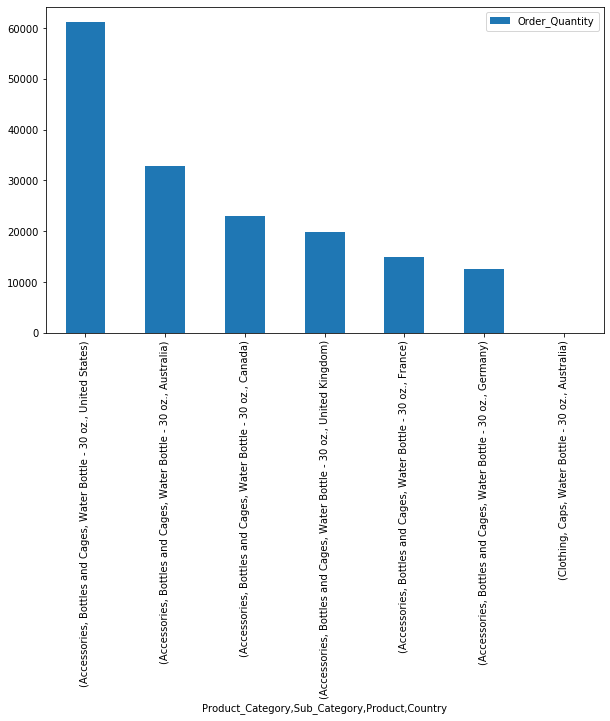

In [19]:
q1.sort_values(by='Order_Quantity', ascending=False).plot(kind='bar',figsize=(10,6))

In [79]:
sales['Product_Category'].value_counts()

Accessories    70120
Bikes          25982
Clothing       16934
Name: Product_Category, dtype: int64

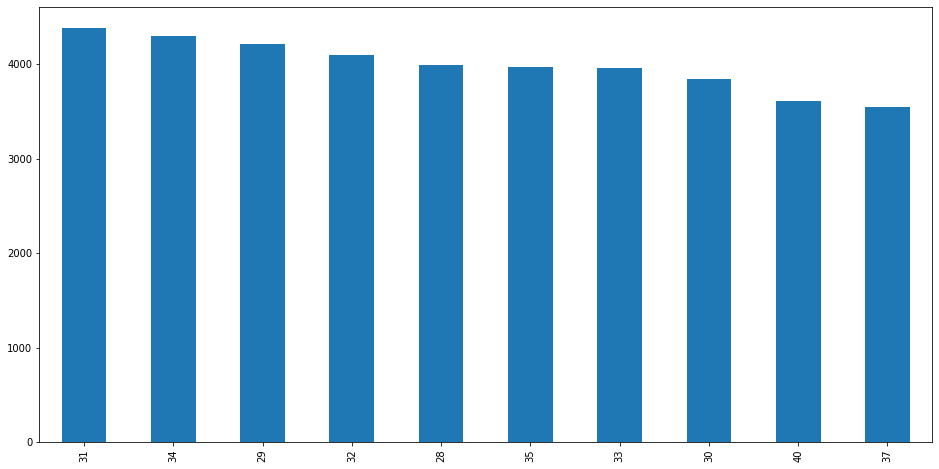

In [80]:
sales['Customer_Age'].value_counts().head(10).plot(kind='bar', figsize=(16,8))

In [81]:
sales['Country'].value_counts()

United States     39206
Australia         23936
Canada            14178
United Kingdom    13620
Germany           11098
France            10998
Name: Country, dtype: int64

In [82]:
sales['Sub_Category'].isin(['Caps']).sum()

4358

In [83]:
sales['Sub_Category'].value_counts()

Tires and Tubes      33870
Bottles and Cages    15876
Road Bikes           13430
Helmets              12158
Mountain Bikes        8854
Jerseys               6010
Caps                  4358
Fenders               4032
Touring Bikes         3698
Gloves                2686
Cleaners              1802
Shorts                1794
Hydration Packs       1334
Socks                 1122
Vests                  964
Bike Racks             592
Bike Stands            456
Name: Sub_Category, dtype: int64

In [84]:
sales['Product'].value_counts()

Water Bottle - 30 oz.      10794
Patch Kit/8 Patches        10416
Mountain Tire Tube          6816
AWC Logo Cap                4358
Sport-100 Helmet, Red       4220
                           ...  
Touring-3000 Blue, 50         58
Mountain-100 Silver, 42       54
Mountain-500 Silver, 48       40
Road-650 Red, 52              32
Mountain-500 Black, 52        22
Name: Product, Length: 130, dtype: int64

In [21]:
t6 = sales.loc[sales['Year'] == 2016]
t6.loc[t6['Month'] == 'May'].shape[0]

5015

In [85]:
cond=(sales['Year'] == 2016) & (sales['Month'] == 'May')
sales.loc[cond].shape[0]

5015

In [86]:
((sales['Year'] == 2016) & (sales['Month'] == 'May')).sum()

5015

In [87]:
import sqlite3

In [88]:
conn = sqlite3.connect('C:/Users/sakila.db')

df = pd.read_sql('''
    SELECT
        rental.rental_id, rental.rental_date, rental.return_date,
        customer.last_name AS customer_lastname,
        store.store_id,
        city.city AS rental_store_city,
        film.title AS film_title, film.rental_duration AS film_rental_duration,
        film.rental_rate AS film_rental_rate, film.replacement_cost AS film_replacement_cost,
        film.rating AS film_rating
    FROM rental
    INNER JOIN customer ON rental.customer_id == customer.customer_id
    INNER JOIN inventory ON rental.inventory_id == inventory.inventory_id
    INNER JOIN store ON inventory.store_id == store.store_id
    INNER JOIN address ON store.address_id == address.address_id
    INNER JOIN city ON address.city_id == city.city_id
    INNER JOIN film ON inventory.film_id == film.film_id
    ;
''', conn, index_col='rental_id', parse_dates=['rental_date', 'return_date'])

In [89]:
df.head()

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating
rental_id,,,,,,,,,,
1,2005-05-24 22:53:30,2005-05-26 22:04:30,HUNTER,1,Lethbridge,BLANKET BEVERLY,7,2.99,21.99,G
2,2005-05-24 22:54:33,2005-05-28 19:40:33,COLLAZO,2,Woodridge,FREAKY POCUS,7,2.99,16.99,R
3,2005-05-24 23:03:39,2005-06-01 22:12:39,MURRELL,2,Woodridge,GRADUATE LORD,7,2.99,14.99,G
4,2005-05-24 23:04:41,2005-06-03 01:43:41,PURDY,1,Lethbridge,LOVE SUICIDES,6,0.99,21.99,R
5,2005-05-24 23:05:21,2005-06-02 04:33:21,HANSEN,2,Woodridge,IDOLS SNATCHERS,5,2.99,29.99,NC-17


In [90]:
df.describe()

,store_id,film_rental_duration,film_rental_rate,film_replacement_cost
count,16044.000000,16044.00000,16044.000000,16044.000000
mean,1.506171,4.93549,2.942630,20.215443
std,0.499978,1.40169,1.649678,6.081771
min,1.000000,3.00000,0.990000,9.990000
25%,1.000000,4.00000,0.990000,14.990000
50%,2.000000,5.00000,2.990000,20.990000
75%,2.000000,6.00000,4.990000,25.990000
max,2.000000,7.00000,4.990000,29.990000


In [91]:
df['rental_store_city'].value_counts()

Woodridge     8121
Lethbridge    7923
Name: rental_store_city, dtype: int64

In [92]:
df.loc[df['film_title'] == 'SCALAWAG DUCK','rental_store_city'].value_counts()

Lethbridge    17
Woodridge     15
Name: rental_store_city, dtype: int64

In [93]:
df.loc[df['film_rating'] == 'NC-17','film_title'].value_counts()

FORWARD TEMPLE         32
SCALAWAG DUCK          32
WIFE TURN              31
APACHE DIVINE          31
ZORRO ARK              31
                       ..
BED HIGHBALL            6
YOUTH KICK              6
HAUNTED ANTITRUST       6
LADYBUGS ARMAGEDDON     6
INFORMER DOUBLE         5
Name: film_title, Length: 202, dtype: int64

In [94]:
df['film_rental_rate'].value_counts()

0.99    5652
4.99    5272
2.99    5120
Name: film_rental_rate, dtype: int64

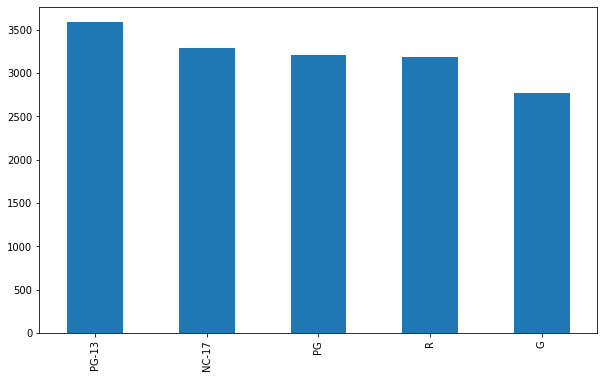

In [95]:
df['film_rating'].value_counts().plot(kind='bar', figsize=(10,6))

In [96]:
btc = pd.read_csv('C:/Users/btc-market-price.csv', header=None)
btc.head(10)

,0,1
0,2017-04-02 00:00:00,1099.169125
1,2017-04-03 00:00:00,1141.813000
2,2017-04-04 00:00:00,1141.600363
3,2017-04-05 00:00:00,1133.079314
4,2017-04-06 00:00:00,1196.307937
5,2017-04-07 00:00:00,1190.454250
6,2017-04-08 00:00:00,1181.149838
7,2017-04-09 00:00:00,1208.800500
8,2017-04-10 00:00:00,1207.744875
9,2017-04-11 00:00:00,1226.617037


In [97]:
btc.columns = ['Timestamp', 'Price']
btc['Timestamp'] = pd.to_datetime(btc['Timestamp'])
btc.set_index('Timestamp', inplace=True)
btc

,Price
Timestamp,
2017-04-02,1099.169125
2017-04-03,1141.813000
2017-04-04,1141.600363
2017-04-05,1133.079314
2017-04-06,1196.307937
...,...
2018-03-28,7960.380000
2018-03-29,7172.280000
2018-03-30,6882.531667


In [98]:
btc.describe()

,Price
count,365.000000
mean,6359.574241
std,4528.878870
min,1099.169125
25%,2585.349186
50%,4594.987850
75%,9182.843333
max,19498.683333


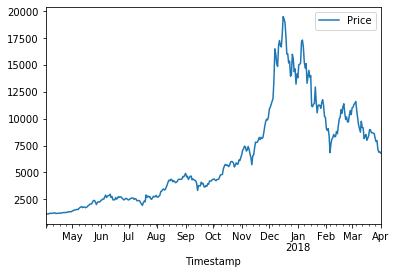

In [99]:
btc.plot()

In [100]:
btc.isnull().sum()

Price    0
dtype: int64

In [24]:
Nutri = pd.read_csv('C:/Users/Nutri.csv',)

In [102]:

Nutri.head(6)


,Food and Serving,Calories,CaloriesÊfrom Fat,Total Fat(g),Total Fat(%DV),Sodium(g),Sodium(%DV),Potassium(g),Potassium(%DV),Total Carbo-hydrate(g),...,Protein(g),Vitamin A(%DV),Vitamin C(%DV),Calcium(%DV),Iron(%DV),Saturated Fat(%DV),Saturated Fat(mg),Chole-sterol(%DV),Chole-sterol(mg),Food Type
0,"Asparagus, 5 spears (93 g/3.3 oz)",20,0,0.0,0,0,0,230,7,4,...,2,10,15,2,2,NaN,NaN,NaN,NaN,"Vegetables, Serving Size (gram weight/Êounce w..."
1,"Bell Pepper, 1 medium (148 g/5.3 oz)",25,0,0.0,0,40,2,220,6,6,...,1,4,190,2,4,NaN,NaN,NaN,NaN,"Vegetables, Serving Size (gram weight/Êounce w..."
2,"Broccoli, 1 medium stalk (148 g/5.3 oz)",45,0,0.5,1,80,3,460,13,8,...,4,6,220,6,6,NaN,NaN,NaN,NaN,"Vegetables, Serving Size (gram weight/Êounce w..."
3,"Carrot, 1 carrot, 7"" long,Ê1 1/4"" diameter (78...",30,0,0.0,0,60,3,250,7,7,...,1,110,10,2,2,NaN,NaN,NaN,NaN,"Vegetables, Serving Size (gram weight/Êounce w..."
4,"Cauliflower, 1/6 medium head (99 g/3.5 oz)",25,0,0.0,0,30,1,270,8,5,...,2,0,100,2,2,NaN,NaN,NaN,NaN,"Vegetables, Serving Size (gram weight/Êounce w..."
5,"Celery, 2 medium stalks (110 g/3.9 oz)",15,0,0.0,0,115,5,260,7,4,...,0,10,15,4,2,NaN,NaN,NaN,NaN,"Vegetables, Serving Size (gram weight/Êounce w..."


In [103]:
Nutri.describe()

,Calories,CaloriesÊfrom Fat,Total Fat(g),Total Fat(%DV),Sodium(g),Sodium(%DV),Potassium(g),Potassium(%DV),Total Carbo-hydrate(g),Total Carbo-hydrate(%DV),...,Sugars(g),Protein(g),Vitamin A(%DV),Vitamin C(%DV),Calcium(%DV),Iron(%DV),Saturated Fat(%DV),Saturated Fat(mg),Chole-sterol(%DV),Chole-sterol(mg)
count,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,...,40.000000,61.000000,61.000000,61.000000,61.000000,61.000000,21.000000,21.000000,21.000000,21.000000
mean,72.540984,9.344262,1.090164,1.704918,53.360656,2.229508,284.672131,8.163934,8.229508,2.786885,...,7.525000,7.655738,11.590164,31.852459,2.721311,3.852459,0.523810,2.666667,64.761905,21.619048
std,43.690416,17.523209,1.954713,2.940206,82.324163,3.489954,120.584925,3.488936,9.085508,3.050217,...,6.804928,9.305707,29.702624,53.701284,2.367355,6.816245,0.766097,3.864367,29.978167,10.091958
min,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,7.000000
25%,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,200.000000,6.000000,0.000000,0.000000,...,2.000000,1.000000,0.000000,2.000000,2.000000,2.000000,0.000000,0.000000,50.000000,17.000000
50%,80.000000,0.000000,0.000000,0.000000,20.000000,1.000000,260.000000,7.000000,5.000000,2.000000,...,5.000000,1.000000,2.000000,10.000000,2.000000,2.000000,0.000000,0.000000,60.000000,20.000000
75%,100.000000,10.000000,1.500000,2.000000,70.000000,3.000000,370.000000,11.000000,13.000000,4.000000,...,11.500000,17.000000,6.000000,35.000000,4.000000,4.000000,1.000000,5.000000,75.000000,25.000000
max,200.000000,90.000000,10.000000,15.000000,330.000000,14.000000,620.000000,18.000000,34.000000,11.000000,...,25.000000,27.000000,130.000000,240.000000,10.000000,45.000000,2.000000,10.000000,170.000000,57.000000


In [104]:
Nutri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 24 columns):
Food and Serving            61 non-null object
Calories                    61 non-null int64
CaloriesÊfrom Fat           61 non-null int64
Total Fat(g)                61 non-null float64
Total Fat(%DV)              61 non-null int64
Sodium(g)                   61 non-null int64
Sodium(%DV)                 61 non-null int64
Potassium(g)                61 non-null int64
Potassium(%DV)              61 non-null int64
Total Carbo-hydrate(g)      61 non-null int64
Total Carbo-hydrate(%DV)    61 non-null int64
Dietary Fiber(g)            40 non-null float64
Dietary Fiber(%DV)          40 non-null float64
Sugars(g)                   40 non-null float64
Protein(g)                  61 non-null int64
Vitamin A(%DV)              61 non-null int64
Vitamin C(%DV)              61 non-null int64
Calcium(%DV)                61 non-null int64
Iron(%DV)                   61 non-null int64
Saturated Fat(

In [25]:
Nutri['Chole-sterol(mg)'].fillna(Nutri['Chole-sterol(mg)'].mean(), inplace=True)

In [106]:
Nutri['Chole-sterol(mg)'].describe()

count    61.000000
mean     21.619048
std       5.826595
min       7.000000
25%      21.619048
50%      21.619048
75%      21.619048
max      57.000000
Name: Chole-sterol(mg), dtype: float64

In [107]:
Nutri.loc[(Nutri['Food Type']=='Vegetables, Serving Size (gram weight/Êounce weight)', 'Food and Serving')]

0                     Asparagus, 5 spears (93 g/3.3 oz)
1                  Bell Pepper, 1 medium (148 g/5.3 oz)
2               Broccoli, 1 medium stalk (148 g/5.3 oz)
3     Carrot, 1 carrot, 7" long,Ê1 1/4" diameter (78...
4            Cauliflower, 1/6 medium head (99 g/3.5 oz)
5                Celery, 2 medium stalks (110 g/3.9 oz)
6                    Cucumber, 1/3 medium (99 g/3.5 oz)
7         Green (Snap) Beans, 3/4 cup cut (83 g/3.0 oz)
8         GreenÊCabbage, 1/12 medium head (84 g/3.0 oz)
9            Green Onion, 1/4 cup chopped (25 g/0.9 oz)
10       Iceberg Lettuce, 1/6 medium head (89 g/3.2 oz)
11      Leaf Lettuce, 1 1/2 cups shredded (85 g/3.0 oz)
12                    Mushrooms, 5 medium (84 g/3.0 oz)
13                       Onion, 1 medium (148 g/5.3 oz)
14                      Potato, 1 medium (148 g/5.3 oz)
15                   Radishes, 7 radishes (85 g/3.0 oz)
16              SummerÊSquash, 1/2 medium (98 g/3.5 oz)
17    Sweet Corn, kernels from 1Êmedium ear (90 

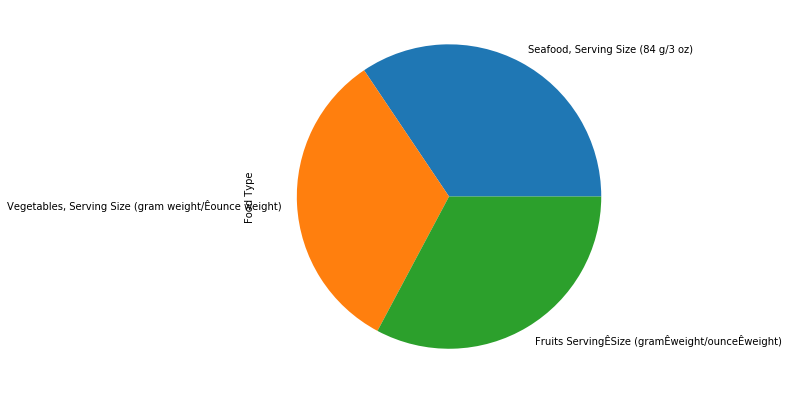

In [108]:
Nutri['Food Type'].value_counts().plot(kind='pie', figsize=(7,7))

In [109]:
Nutri.head(2)

,Food and Serving,Calories,CaloriesÊfrom Fat,Total Fat(g),Total Fat(%DV),Sodium(g),Sodium(%DV),Potassium(g),Potassium(%DV),Total Carbo-hydrate(g),...,Protein(g),Vitamin A(%DV),Vitamin C(%DV),Calcium(%DV),Iron(%DV),Saturated Fat(%DV),Saturated Fat(mg),Chole-sterol(%DV),Chole-sterol(mg),Food Type
0,"Asparagus, 5 spears (93 g/3.3 oz)",20,0,0.0,0,0,0,230,7,4,...,2,10,15,2,2,NaN,NaN,NaN,21.619048,"Vegetables, Serving Size (gram weight/Êounce w..."
1,"Bell Pepper, 1 medium (148 g/5.3 oz)",25,0,0.0,0,40,2,220,6,6,...,1,4,190,2,4,NaN,NaN,NaN,21.619048,"Vegetables, Serving Size (gram weight/Êounce w..."


In [110]:
Nutri.loc[(Nutri['Food Type']=='Vegetables, Serving Size (gram weight/Êounce weight)') & (Nutri['Calories']<20)].min()

Food and Serving                       Celery, 2 medium stalks (110 g/3.9 oz)
Calories                                                                   10
CaloriesÊfrom Fat                                                           0
Total Fat(g)                                                                0
Total Fat(%DV)                                                              0
Sodium(g)                                                                   0
Sodium(%DV)                                                                 0
Potassium(g)                                                               70
Potassium(%DV)                                                              2
Total Carbo-hydrate(g)                                                      2
Total Carbo-hydrate(%DV)                                                    1
Dietary Fiber(g)                                                            1
Dietary Fiber(%DV)                                              

In [114]:
Nutri.loc[(Nutri['Food Type']=='Vegetables, Serving Size (gram weight/Êounce weight)') & (Nutri['Calories']<15)]

,Food and Serving,Calories,CaloriesÊfrom Fat,Total Fat(g),Total Fat(%DV),Sodium(g),Sodium(%DV),Potassium(g),Potassium(%DV),Total Carbo-hydrate(g),...,Protein(g),Vitamin A(%DV),Vitamin C(%DV),Calcium(%DV),Iron(%DV),Saturated Fat(%DV),Saturated Fat(mg),Chole-sterol(%DV),Chole-sterol(mg),Food Type
6,"Cucumber, 1/3 medium (99 g/3.5 oz)",10,0,0.0,0,0,0,140,4,2,...,1,4,10,2,2,NaN,NaN,NaN,21.619048,"Vegetables, Serving Size (gram weight/Êounce w..."
9,"Green Onion, 1/4 cup chopped (25 g/0.9 oz)",10,0,0.0,0,10,0,70,2,2,...,0,2,8,2,2,NaN,NaN,NaN,21.619048,"Vegetables, Serving Size (gram weight/Êounce w..."
10,"Iceberg Lettuce, 1/6 medium head (89 g/3.2 oz)",10,0,0.0,0,10,0,125,4,2,...,1,6,6,2,2,NaN,NaN,NaN,21.619048,"Vegetables, Serving Size (gram weight/Êounce w..."
15,"Radishes, 7 radishes (85 g/3.0 oz)",10,0,0.0,0,55,2,190,5,3,...,0,0,30,2,2,NaN,NaN,NaN,21.619048,"Vegetables, Serving Size (gram weight/Êounce w..."


In [115]:
phone = pd.read_csv('C:/Users/Phone_sales.csv')
phone.head(10)

,title,title_orig,discount_price,discount_price_currency,retail_price,retail_price_currency,discount_price_in_original_currency,nb_cart_orders_approx,nb_units_purchased_approx,uses_ad_boosts,...,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id
0,Playstation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.wish.com/c/5ea1a2969719ed8249092ee9,NaN,5ea1a2969719ed8249092ee9
1,2020 4G 5G tÃ©lÃ©phone portable nouvelle empre...,2020 4G 5G Mobile Phone New Fingerprint Unlock...,43.0,EUR,1650.0,EUR,52.0,10.0,NaN,NaN,...,doodsble,41 % avis positifs (135 notes),135.0,2.362963,5fd2d30d518a8f1ad03ae683,NaN,NaN,https://www.wish.com/c/601910954ebbcd48ded67c56,https://canary.contestimg.wish.com/api/webimag...,601910954ebbcd48ded67c56
2,Mate40 RS 6.1 inch HD+ Screen Mobile Phones 12...,Mate40 RS 6.1 inch HD+ Screen Mobile Phones 12...,42.0,EUR,42.0,EUR,50.0,10.0,NaN,NaN,...,adorejoy,87 % avis positifs (427 notes),427.0,3.997658,59ddc716ef7b897ed087f34a,NaN,NaN,https://www.wish.com/c/6043186d50d4322511963272,https://canary.contestimg.wish.com/api/webimag...,6043186d50d4322511963272
3,(Refurbished)Original Apple IPhone 4s 3.5inch ...,(Refurbished)Original Apple IPhone 4s 3.5inch ...,29.0,EUR,29.0,EUR,34.0,5.0,NaN,NaN,...,polarisvalues,82% Positive Feedback (77 ratings),77.0,4.064935,5fa254d65daba2267df4eff0,NaN,NaN,https://www.wish.com/c/5fd1de7f3437b537b55f1a0b,https://canary.contestimg.wish.com/api/webimag...,5fd1de7f3437b537b55f1a0b
4,iPhone Xr 64 Go Coral NOUVEAU DÃ‰VERROUILLÃ‰,iPhone Xr 64GB Coral NEW UNLOCKED,472.0,EUR,520.0,EUR,572.0,10.0,NaN,NaN,...,blackbulls,84 % avis positifs (441 notes),441.0,4.151927,5d685c81bbfaf82f856901dc,NaN,NaN,https://www.wish.com/c/5f627d27707e37b4a2e18ca2,https://canary.contestimg.wish.com/api/webimag...,5f627d27707e37b4a2e18ca2
5,Le plus petit tÃ©lÃ©phone intelligent Melrose ...,Smallest Smart Phone Melrose S9X S9P Ultrathin...,46.0,EUR,46.0,EUR,55.0,10000.0,NaN,NaN,...,sherbang,"88 % avis positifs (3,350 notes)",3350.0,4.207761,5af00a81f0b75f6851bd62eb,NaN,NaN,https://www.wish.com/c/5d3fa77161fd657330b1aee6,https://canary.contestimg.wish.com/api/webimag...,5d3fa77161fd657330b1aee6
6,Soundpeats,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.wish.com/c/5e8d300a9719ed64049677fc,NaN,5e8d300a9719ed64049677fc
7,IP68 Ã©tanche montre intelligente frÃ©quence c...,IP68 Waterproof Smart Watch Heart Rate Blood ...,20.0,EUR,314.0,EUR,24.0,10.0,NaN,NaN,...,dresslife,"(29,729 notes)",29729.0,4.237142,58b647d996f1bb76fe8fb2ed,NaN,NaN,https://www.wish.com/c/5fbf800ec8f81fdf92e3eb0e,https://canary.contestimg.wish.com/api/webimag...,5fbf800ec8f81fdf92e3eb0e
8,Apple iPhone 7 remis Ã neuf de qualitÃ© A,Apple iPhone 7 Refurbished A grade,210.0,EUR,210.0,EUR,254.0,10.0,NaN,NaN,...,daese01,66 % avis positifs (110 notes),110.0,3.390909,5ed762f3f4010f0bc3876499,NaN,NaN,https://www.wish.com/c/5fe00c3d3cc4df0cd0275065,https://canary.contestimg.wish.com/api/webimag...,5fe00c3d3cc4df0cd0275065
9,2021 Newst Phone i12 Pro Max Nouveau smartphon...,2021 Newst Phone i12 Pro Max New smartphone wi...,76.0,EUR,904.0,EUR,92.0,10.0,NaN,NaN,...,charlescl,65 % avis positifs (20 notes),20.0,3.400000,5e8a981aeb515a9deb006f57,NaN,NaN,https://www.wish.com/c/5fec225b1ca95e1c2ba9dc5d,https://canary.contestimg.wish.com/api/webimag...,5fec225b1ca95e1c2ba9dc5d


In [116]:
phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 659 entries, 0 to 658
Data columns (total 44 columns):
title                                  658 non-null object
title_orig                             587 non-null object
discount_price                         587 non-null float64
discount_price_currency                587 non-null object
retail_price                           587 non-null float64
retail_price_currency                  587 non-null object
discount_price_in_original_currency    587 non-null float64
nb_cart_orders_approx                  587 non-null float64
nb_units_purchased_approx              0 non-null float64
uses_ad_boosts                         0 non-null float64
rating                                 587 non-null float64
rating_count                           587 non-null float64
rating_five_count                      430 non-null float64
rating_four_count                      430 non-null float64
rating_three_count                     430 non-null float64
rat

In [117]:
phone.columns

Index(['title', 'title_orig', 'discount_price', 'discount_price_currency',
       'retail_price', 'retail_price_currency',
       'discount_price_in_original_currency', 'nb_cart_orders_approx',
       'nb_units_purchased_approx', 'uses_ad_boosts', 'rating', 'rating_count',
       'rating_five_count', 'rating_four_count', 'rating_three_count',
       'rating_two_count', 'rating_one_count', 'badges_count',
       'badge_local_product', 'badge_product_quality', 'badge_fast_shipping',
       'tags', 'product_color', 'product_variation_size_id',
       'product_variation_inventory', 'shipping_option_name',
       'shipping_option_price', 'shipping_is_express', 'countries_shipped_to',
       'inventory_total', 'has_urgency_banner', 'urgency_text',
       'origin_country', 'merchant_title', 'merchant_name',
       'merchant_info_subtitle', 'merchant_rating_count', 'merchant_rating',
       'merchant_id', 'merchant_has_profile_picture',
       'merchant_profile_picture', 'product_url', 'produc

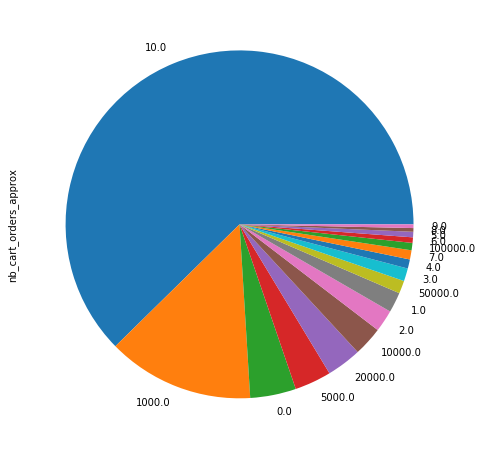

In [118]:
phone['nb_cart_orders_approx'].value_counts().plot(kind='pie', figsize= (8,8))

In [119]:
phone.loc[(phone['merchant_id'] == '5e6932c9a1f2afe71e2ebd74') & (phone['retail_price'] > 700)].max()

title                                  iPhone XR 256 Go Blue Factory dÃ©bloquÃ© dans ...
title_orig                             iPhone XR 256GB Blue Factory Unlocked Worldwid...
discount_price                                                                       990
discount_price_currency                                                              EUR
retail_price                                                                        1320
retail_price_currency                                                                EUR
discount_price_in_original_currency                                              1199.99
nb_cart_orders_approx                                                                 10
nb_units_purchased_approx                                                            NaN
uses_ad_boosts                                                                       NaN
rating                                                                                 5
rating_count         

In [120]:
phone.loc[(phone['rating'] >= 4.5)].shape[0]

208

In [121]:
208/659*100

31.56297420333839

In [122]:
phone.fillna(0,inplace=True)
phone.describe()


,discount_price,retail_price,discount_price_in_original_currency,nb_cart_orders_approx,nb_units_purchased_approx,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,...,badge_fast_shipping,tags,product_variation_inventory,shipping_option_price,countries_shipped_to,inventory_total,merchant_rating_count,merchant_rating,merchant_has_profile_picture,merchant_profile_picture
count,659.000000,659.000000,659.000000,659.000000,659.0,659.0,659.000000,659.000000,659.000000,659.000000,...,659.0,659.0,659.000000,659.000000,659.0,659.000000,6.590000e+02,659.000000,659.0,659.0
mean,153.686434,299.226100,185.873536,2236.476480,0.0,0.0,3.598969,535.974203,322.983308,95.189681,...,0.0,0.0,34.121396,31.676206,0.0,39.889226,4.016996e+04,3.467869,0.0,0.0
std,275.671346,475.695845,334.136124,9861.027763,0.0,0.0,1.562778,2836.492471,1774.290528,513.108142,...,0.0,0.0,21.328816,61.786852,0.0,18.821789,3.553292e+05,1.342462,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000e+00,0.000000,0.0,0.0
25%,4.000000,7.000000,4.775000,10.000000,0.0,0.0,3.157631,0.000000,0.000000,0.000000,...,0.0,0.0,9.000000,1.000000,0.0,50.000000,4.700000e+01,3.389003,0.0,0.0
50%,30.000000,46.000000,36.000000,10.000000,0.0,0.0,4.081967,5.000000,2.000000,1.000000,...,0.0,0.0,50.000000,10.000000,0.0,50.000000,3.790000e+02,3.979494,0.0,0.0
75%,111.500000,471.000000,134.500000,10.000000,0.0,0.0,5.000000,110.500000,54.500000,17.500000,...,0.0,0.0,50.000000,12.000000,0.0,50.000000,2.174500e+03,4.236484,0.0,0.0
max,1562.000000,3051.000000,1893.000000,100000.000000,0.0,0.0,5.000000,40712.000000,27664.000000,7405.000000,...,0.0,0.0,50.000000,299.990000,0.0,50.000000,3.464509e+06,5.000000,0.0,0.0


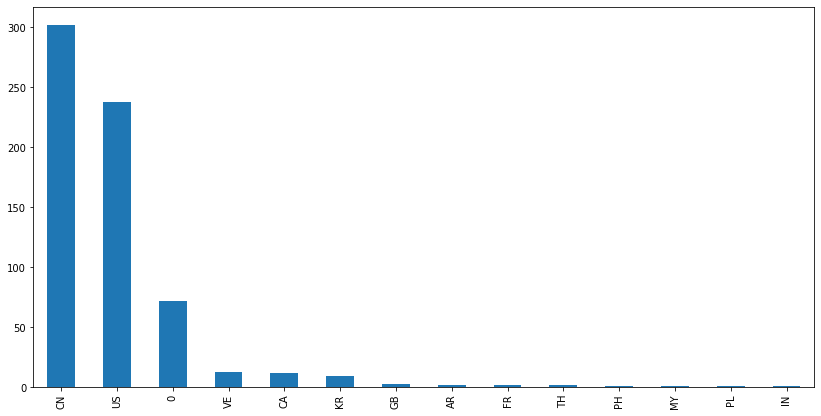

In [123]:
phone['origin_country'].value_counts().plot(kind='bar', figsize=(14,7))

In [124]:
phone.loc[(phone['retail_price'] > 200) & (phone['origin_country'] == 'CN')].head(5)

,title,title_orig,discount_price,discount_price_currency,retail_price,retail_price_currency,discount_price_in_original_currency,nb_cart_orders_approx,nb_units_purchased_approx,uses_ad_boosts,...,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id
7,IP68 Ã©tanche montre intelligente frÃ©quence c...,IP68 Waterproof Smart Watch Heart Rate Blood ...,20.0,EUR,314.0,EUR,24.0,10.0,0.0,0.0,...,dresslife,"(29,729 notes)",29729.0,4.237142,58b647d996f1bb76fe8fb2ed,0.0,0.0,https://www.wish.com/c/5fbf800ec8f81fdf92e3eb0e,https://canary.contestimg.wish.com/api/webimag...,5fbf800ec8f81fdf92e3eb0e
10,Mini TÃ©lÃ©phone Mobile Ultra Mince De Luxe TÃ...,Mini Mobile Phone Ultrathin Luxury Phone Mp3 P...,43.0,EUR,247.0,EUR,52.0,10.0,0.0,0.0,...,æ·±åœ³å¸‚åŒåˆ›æ–‡åŒ–ä¼ æ’­æœ‰é™å…¬å¸,"88 % avis positifs (2,783 notes)",2783.0,4.214517,540690107a9eb466343c6f1e,0.0,0.0,https://www.wish.com/c/5aeac52ce081841cc659010c,https://canary.contestimg.wish.com/api/webimag...,5aeac52ce081841cc659010c
16,Phone i12 Pro Max Nouveau smartphone avec tÃ©l...,Phone i12 Pro Max New smartphone with 7.2 inch...,81.0,EUR,1063.0,EUR,97.0,10.0,0.0,0.0,...,dai1234,(38 notes),38.0,3.421053,5f8ea900798cef3ffefdfd39,0.0,0.0,https://www.wish.com/c/5fae21a1c35f66d0ba9eff40,https://canary.contestimg.wish.com/api/webimag...,5fae21a1c35f66d0ba9eff40
23,TrÃ©pied d'appareil photo de voyage portable S...,Portable Travel Camera Tripod Aluminum Camera ...,22.0,EUR,247.0,EUR,26.0,1000.0,0.0,0.0,...,qingjiagongstore,87 % avis positifs (995 notes),995.0,4.162814,5d529f98152754432d5fe0dd,0.0,0.0,https://www.wish.com/c/5d7dc50294f5bc1af654b54a,https://canary.contestimg.wish.com/api/webimag...,5d7dc50294f5bc1af654b54a
49,"Black Friday Vente chaude 7,3 pouces 4G / 5G S...",Black Friday Hot Sale 7.3 Inch 4G/5G Smartphon...,95.0,EUR,2473.0,EUR,114.0,10.0,0.0,0.0,...,wanyueduixi,74 % avis positifs (105 notes),105.0,3.600000,5daa798925c15d09859be404,0.0,0.0,https://www.wish.com/c/5faf920f9662d027111906a1,https://canary.contestimg.wish.com/api/webimag...,5faf920f9662d027111906a1


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
BY = pd.read_csv('BAYELSA-RRR STATE BENEFICIARY.csv')
BY

,S/N,STATE,LGA,WARD,COMMUNITY,FULL NAME,PHONE NO,AGE,ADDRESS/STREET,GENDER
0,1,BAYELSA,OGBIA,OGBIA,NIL,RITA OGOUN,7010070553,30,20,Female
1,2,BAYELSA,OGBIA,OGBIA,NIL,PROMISE EBI,7011717135,44,4 HOUSE,Female
2,3,BAYELSA,OGBIA,OGBIA,NIL,OBI MOSES,7013999612,28,IVY COMPOUND,Male
3,4,BAYELSA,OGBIA,OGBIA,NIL,BOMO BOMO-IYO,7014933570,35,"BOY'S QUARTER'S OGBIA TOWN, ANGOLA PARK",Male
4,5,BAYELSA,OGBIA,OGBIA,NIL,,7015304400,0,NIL,NaN
...,...,...,...,...,...,...,...,...,...,...
33475,33476,BAYELSA,YENAGOA,EPIE I,YENEGWE,OLUOMACHI IKE,9138889227,24,OPOLO YENAGOA,Female
33476,33477,BAYELSA,YENAGOA,EPIE I,YENEGWE,FIENIYA OZI,9139054418,31,31#,Female
33477,33478,BAYELSA,YENAGOA,EPIE I,YENEGWE,31# 1,9139087416,38,31#,Female
33478,33479,BAYELSA,YENAGOA,EPIE I,YENEGWE,JOSEPH THOMPSON,9139092938,17,44 LOGOLD STREET,Male


In [133]:
BY['COMMUNITY'].value_counts()

YENAGOA         9682
AGUDAMA EPIE    4769
AKENFA          3813
OVOM            3077
ONOPA           2688
IGBOGENE        2536
OGBIA TOWN      2498
AKENPAI         2152
YENEGWE         1704
NIL              289
IDEMA            142
EBOH              79
OBEDUMA           51
Name: COMMUNITY, dtype: int64

In [6]:
BY['GENDER'].value_counts()

Male      17856
Female    14426
Name: GENDER, dtype: int64

In [7]:
BY['LGA'].value_counts()

YENAGOA    30671
OGBIA       2809
Name: LGA, dtype: int64

In [26]:
BY.loc[BY['PHONE NO'] == 7086456792]

,S/N,STATE,LGA,WARD,COMMUNITY,FULL NAME,PHONE NO,AGE,ADDRESS/STREET,GENDER
27569,27570,BAYELSA,YENAGOA,EPIE I,AKENPAI,NUMONANATEI NUMONDE STANLEY,7086456792,25,EMDO CLOSE BEHIND MOSQUE,Male


In [27]:
BY['WARD'].value_counts()

ATTISSAI I    15447
EPIE I        15129
OGBIA          2809
NIL              95
Name: WARD, dtype: int64